In [11]:
import mne
print('MNE Version:', mne.__version__)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
%matplotlib qt5

%load_ext autoreload
%autoreload 2
import WU_MEG_DP

MNE Version: 1.0.3


In [12]:
Settings = {}

# Directory to read file for analysis.
# inDataDir = "E:\Work\PostDoc\Data\Sample Data\Long\\MEG_Data_20210805_Stage1"
# Settings["inDataDir"] = "E:\Work\PostDoc\Data\Sample Data\Long\\MEG_Data_20210805_Stage2_EMD"
# Settings["inDataDir"] = 'D:\\Data\OCT_TDT\pre_stimuli\Stage4\data_PGA'
Settings["inDataDir"] = "D:\\Data\OCT_TDT\clustered1\Stage1\data_PGA"
# Settings["inDataDir"] = "D:\\Data\OCT_TDT\clustered1\Stage1\data_Stage2_EMD"

# File name to analyze.
# Settings["DataFileNames"] = ["sub1008_Stage2_EMD.pkl"]
Settings["DataFileNames"] = ["sub1008_PGA.pkl"]

In [29]:
# Controls
# timeRangeList = [(-200, 200), (-200, 800), (0, 800), (-200, 0), (5800, 6000)]
timeRangeList = [(0, 800)]
# timeRangeList = [(5800, 6200), (6000, 6800)]
# Selection of time segments to prepare
# baselineList = [(-200, 0), (-200, -0), (0, 0), (-200, -200), (5800, 6000)]
baselineList = [(0, 0)]
# baselineList = [(5800, 6000), (5800, 6000)]
# Selection of baselines for the segments to prepare

segNum = 0
# Which segment to plot.

type = 'flip'
# Parameter type has two options: 'base' and 'flip' and which define what data to load. All the recorded epochs or the flipped epochs.
dedication = 'all'
# Parameter dedication selects 'all', 'train' or 'test' subset.

In [30]:
# Load project library.
sl = WU_MEG_DP.Sumitomo_Decoding_Long(Settings, loadSettings='yes')

Script by Dmitry Patashov
WU Script Version: 3.7.3



In [31]:
# Load Data
segment_manager = sl.LoadSegmentData(Settings["DataFileNames"][0], Settings["inDataDir"])
eventLog = segment_manager.epochs_manager['log']
# Print current logfile
eventLog.printLog()

                                                Settings
subject                                             1008
badChannels                                     [18, 21]
numberOfChannels                                      64
eventChannels                           (64, 65, 66, 67)
fullDump                                              no
RawDataFiltration                                    yes
cutoff_l                                             0.1
cutoff_h                                              40
DT                                                  auto
DT_param                                            None
epochTypes                [010, 011, 100, 101, 110, 111]
resemple                                             yes
new_freq                                             500
tmin                                                -0.2
tmax                                                 0.8
baseline                                       (-0.2, 0)
min_event_duration             

In [32]:
# <<<<<<< ------- Example of how to get the train and test datasets ------- >>>>>>> #
print('Number of segments: ', segment_manager.numberOfSegments, ' ', end="")
segment_manager.PrintSegments() # Prints segment ranges in ms.

segment_manager.AddSegments(timeRangeList, baselineList) # Adds requested segments

print('\nNumber of segments: ', segment_manager.numberOfSegments, ' ', end="")
segment_manager.PrintSegments()
dataSegment = segment_manager.dataSegmentList[0] # Get first segment. [1]/[2]/[3]... will get the 2nd, 3rd and so on.
# dataSegment has the following fields:
# 'time' - Full time vector
# 'stamps' - Indices of respective segment border values
# 'range' - Segment border values
# 'baseline' - Base line that is not included in the analysis
# 'MLready' - Can be either 'yes' or 'no', referring to, if the 'train' and 'test' data is prepared.
# And event type field (e.g. '010', '111'), which has 4 subfields: 'base', 'flip', 'train' and 'test'.

trData = dataSegment['010']['train'] # Extract train data for event 010
teData = dataSegment['010']['test'] # Extract test data for event 010
print("\nTrain data size 010: 0-200ms" ,trData.shape)
print("Test data size 010: 0-200ms" ,teData.shape)

# segment_manager.RemoveSegment(timeRangeList[2]) # Removes requested segments
# print('\nNumber of segments: ', segment_manager.numberOfSegments, ' ', end="")
# segment_manager.PrintSegments()

Number of segments:  0  []

Number of segments:  1  [(0, 800)]

Train data size 010: 0-200ms (118, 64, 399)
Test data size 010: 0-200ms (118, 64, 399)


In [33]:
combinationsSet = segment_manager.combinationsSet

In [34]:
timeRange = timeRangeList[segNum]
# Segment range
baseline = baselineList[segNum]
# Baseline for the plotted segment.

# If for any reason you would like to extract a specific segment and work with it in epochs manager, following command will perform the conversion.
epochs_manager = sl.Segment2Epoch_manager(segment_manager, timeRange, type, baseline)

In [35]:
# Calculate grand-average.
# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog)
evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog, dedication=dedication)

# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog, type='base', dedication='train')
# Two additional parameters are non-mondatory. The function may be used as:
# evoked_conditions = sl.PrepareEnvokedConditions(epochs_manager, eventLog)
# Parameter type has two options: 'base' and 'pga' which define what data to load. All the raw epochs or the PGA averaged ones.
# Parameter dedication selects 'train' or 'test' subset if 'pga' option was selected for type.
# The function returns:
# evoked_conditions - Dictionary containing evoked conditions for all the datasets.
# To access the specific dataset use: evoked_conditions['111']. This example will access dataset number 7.

In [36]:
# Constant Definitions
ts_args = dict(gfp=False, time_unit='ms')
topomap_args = dict(sensors=True, time_unit='ms')
# plt_times = np.array([0.2,0.4,0.6])
plt_times = 'auto'

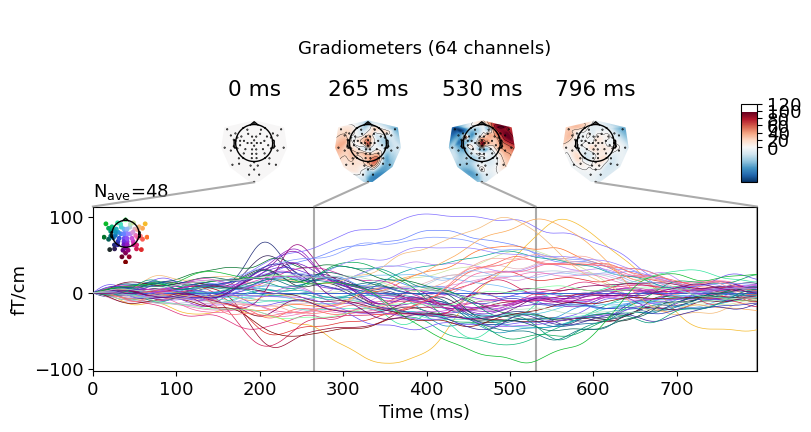

In [37]:
evoked_conditions['010'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

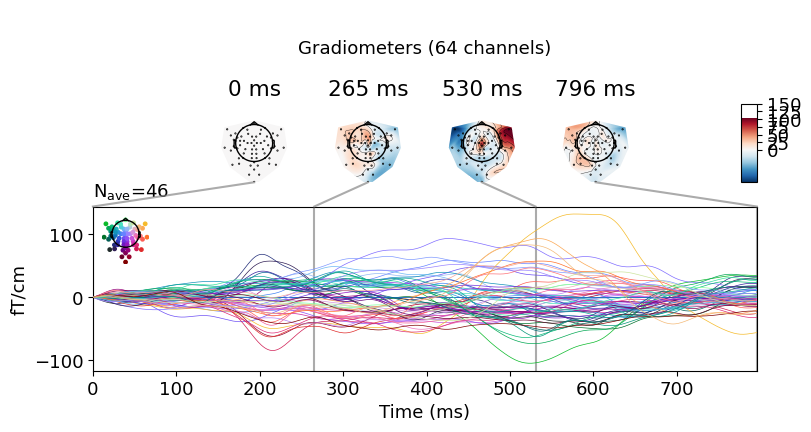

In [38]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['011'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

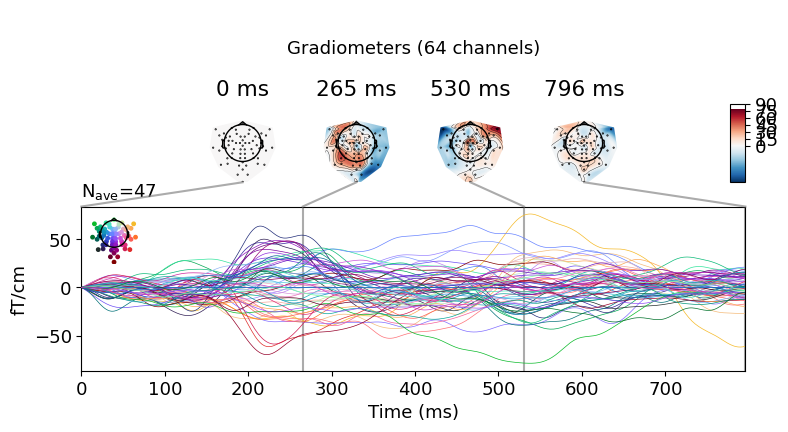

In [39]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['100'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

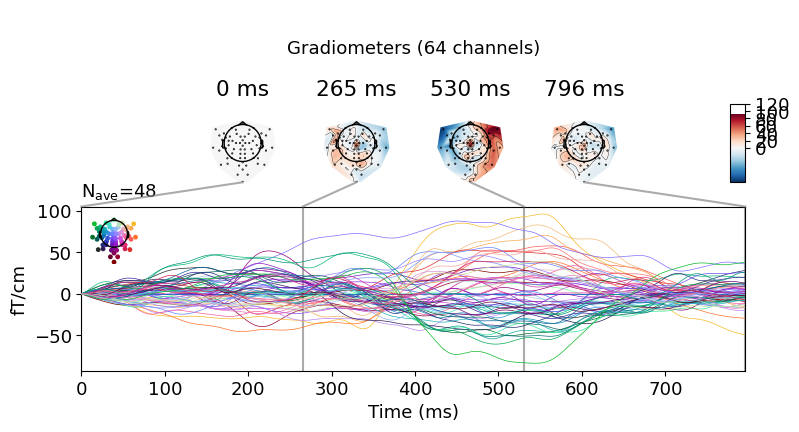

In [40]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['101'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

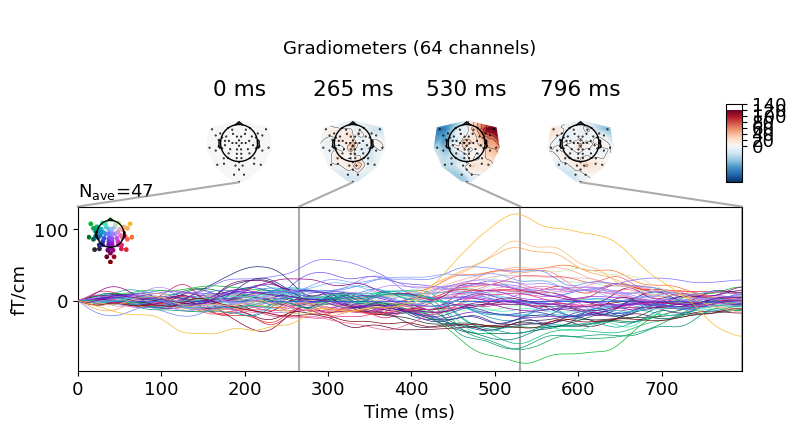

In [41]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['110'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

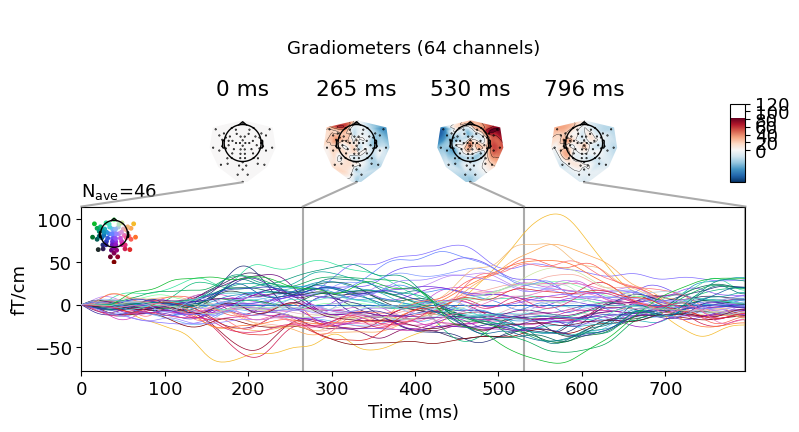

In [42]:
fig = plt.gcf()
plt.close(fig)
evoked_conditions['111'].plot_joint(times=plt_times, ts_args=ts_args, topomap_args=topomap_args)

In [43]:
fig = plt.gcf()
plt.close(fig)

In [44]:
plt.figure()
plt.rcParams['font.size'] = 13

ax1 = plt.subplot(321)
evoked_conditions['010'].plot(axes=ax1, spatial_colors=True, time_unit='ms')
ax1.grid(axis='x')
plt.title('Sushi')

ax2 = plt.subplot(325, sharex=ax1, sharey=ax1)
evoked_conditions['011'].plot(axes=ax2, spatial_colors=True, time_unit='ms')
ax2.grid(axis='x')
plt.title('Gyoza')

ax3 = plt.subplot(323, sharex=ax1, sharey=ax1)
evoked_conditions['100'].plot(axes=ax3, spatial_colors=True, time_unit='ms')
ax3.grid(axis='x')
plt.title('Cookie')

ax4 = plt.subplot(324, sharex=ax1, sharey=ax1)
evoked_conditions['101'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Knife')

ax4 = plt.subplot(322, sharex=ax1, sharey=ax1)
evoked_conditions['110'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Brush')

ax4 = plt.subplot(326, sharex=ax1, sharey=ax1)
evoked_conditions['111'].plot(axes=ax4, spatial_colors=True, time_unit='ms')
ax4.grid(axis='x')
plt.title('Pencil')

plt.show()